In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
train=pd.read_csv('/content/train_ctrUa4K.csv')

In [242]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [243]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


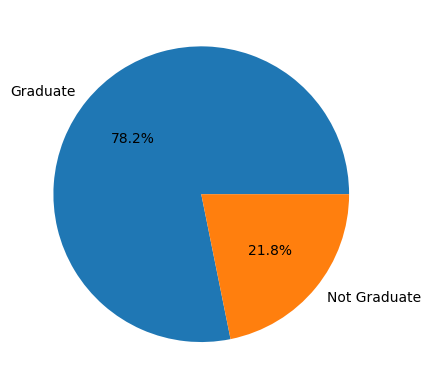

In [244]:
df1=train['Education'].value_counts()
plt.pie(df1,labels=df1.index,autopct='%1.1f%%')
plt.show()

Graduate applicants are more.

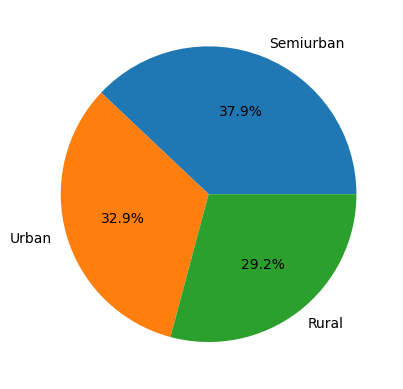

In [245]:
df1=train['Property_Area'].value_counts()
plt.pie(df1,labels=df1.index,autopct='%1.1f%%')
plt.show()

Apllicants in semiurban are more

In [246]:
test=pd.read_csv('/content/test_lAUu6dG.csv')

In [247]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [248]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [249]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


PREPROCESSING

In [250]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

In [251]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [252]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [253]:
for i in ['Gender','Married','Dependents','Self_Employed']:
    train[i]=train[i].fillna(train[i].mode()[0])

In [254]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    train[i]=train[i].fillna(train[i].median())

In [255]:
for i in ['Gender','Dependents','Self_Employed']:
    test[i]=test[i].fillna(test[i].mode()[0])

In [256]:
for i in ['LoanAmount','Loan_Amount_Term','Credit_History']:
    test[i]=test[i].fillna(test[i].median())

In [257]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

NULL VALUES ARE REMOVED

In [258]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

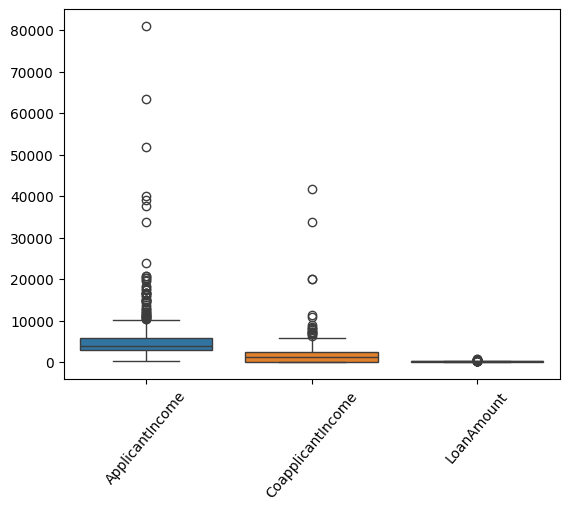

In [259]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=50)
plt.show()

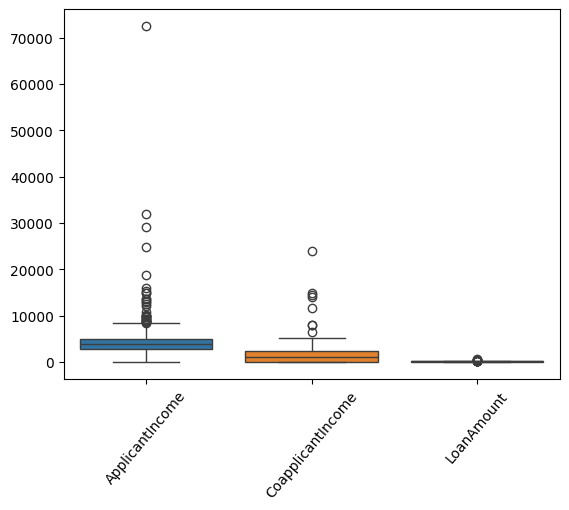

In [260]:
sns.boxplot(test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=50)
plt.show()

In [261]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(train[i],25,method='midpoint')
    Q3=np.percentile(train[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in train[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    train[i]=train[i].clip(lower=low_lim,upper=up_lim)

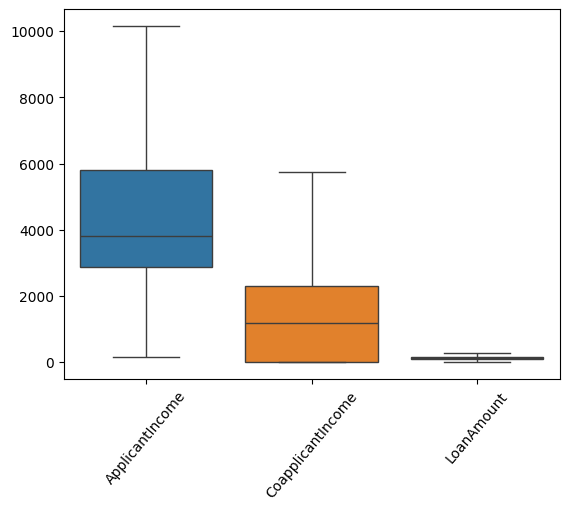

In [262]:
sns.boxplot(train[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=50)
plt.show()

In [263]:
for i in ['ApplicantIncome','CoapplicantIncome','LoanAmount']:
    Q1=np.percentile(test[i],25,method='midpoint')
    Q3=np.percentile(test[i],75,method='midpoint')
    IQR=Q3-Q1
    low_lim=Q1-1.5*IQR
    up_lim=Q3+1.5*IQR
    outliers=[]
    for j in test[i]:
        if ((j < low_lim) | (j > up_lim)):
            outliers.append(j)
    test[i]=test[i].clip(lower=low_lim,upper=up_lim)

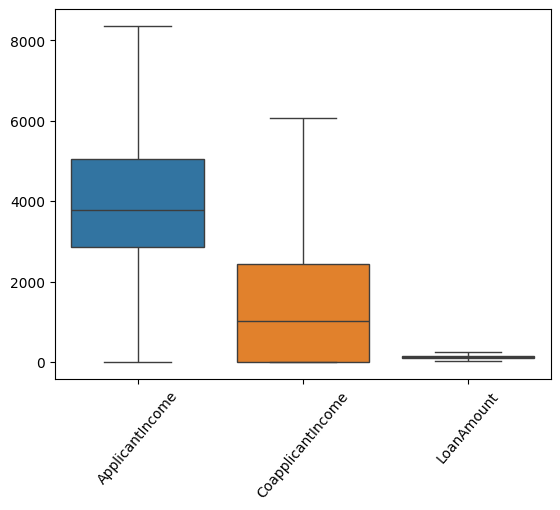

In [264]:
sns.boxplot(test[['ApplicantIncome','CoapplicantIncome','LoanAmount']])
plt.xticks(rotation=50)
plt.show()

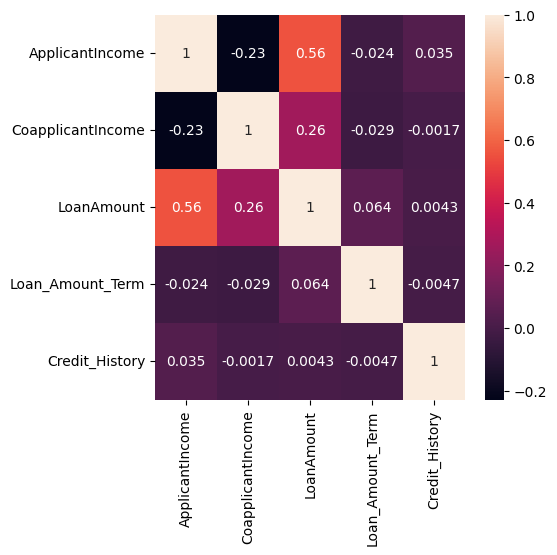

In [265]:
mat=train.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(mat,annot=True)
plt.show()

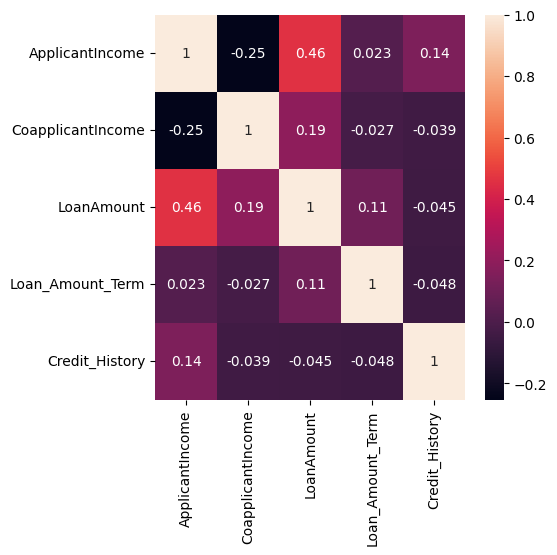

In [266]:
mat=test.select_dtypes(['int64','float64']).corr()
plt.subplots(figsize=(5,5))
sns.heatmap(mat,annot=True)
plt.show()

In [267]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [268]:
le=LabelEncoder()
for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area','Loan_Status']:
    train[i]=le.fit_transform(train[i])

In [269]:
for i in ['Gender','Married','Dependents','Self_Employed','Education','Property_Area']:
    test[i]=le.fit_transform(test[i])

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
x=train.drop('Loan_Status',axis=1)
y=train['Loan_Status'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [272]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(x_test)


In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [274]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [275]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [276]:
import warnings
warnings.filterwarnings("ignore")

LOGICAL REGRESSION

In [277]:
log_reg=LogisticRegression()
log_reg.fit(x_train_sc,y_train)
log_reg_pred=log_reg.predict(x_train_sc)

In [278]:
print('Accuracy ', accuracy_score(y_train,log_reg_pred))
print('Precision', precision_score(y_train,log_reg_pred))
print('Recall ',recall_score(y_train,log_reg_pred))
print('F1 score ', f1_score(y_train,log_reg_pred))

Accuracy  0.8205128205128205
Precision 0.8048780487804879
Recall  0.9834437086092715
F1 score  0.8852459016393444


KNN

In [279]:
classifier=KNeighborsClassifier()
classifier.fit(x_train_sc,y_train)
knn_pred=classifier.predict(x_train_sc)

In [280]:
print('Accuracy ', accuracy_score(y_train,knn_pred))
print('Precision ', precision_score(y_train,knn_pred))
print('Recall ',recall_score(y_train,knn_pred))
print('F1 scorer', f1_score(y_train,knn_pred))

Accuracy  0.8298368298368298
Precision  0.8243626062322946
Recall  0.9635761589403974
F1 scorer 0.8885496183206107


SVM

In [281]:
sv_clf=SVC()
sv_clf.fit(x_train_sc,y_train)
svm_pred=sv_clf.predict(x_train_sc)

In [282]:
print('Accuracy ', accuracy_score(y_train,svm_pred))
print('Precision', precision_score(y_train,svm_pred))
print('Recall :',recall_score(y_train,svm_pred))
print('F1 score', f1_score(y_train,svm_pred))

Accuracy  0.8251748251748252
Precision 0.8075880758807588
Recall : 0.9867549668874173
F1 score 0.8882265275707898


Decision Tree

In [283]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train_sc,y_train)
dt_pred=dt_clf.predict(x_train_sc)

In [284]:
print('Accuracy ', accuracy_score(y_train,dt_pred))
print('Precision ', precision_score(y_train,dt_pred))
print('Recall ',recall_score(y_train,dt_pred))
print('F1 score', f1_score(y_train,dt_pred))

Accuracy  0.9976689976689976
Precision  1.0
Recall  0.9966887417218543
F1 score 0.9983416252072967


Random Forest

In [285]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train_sc,y_train)
rf_pred=rf_clf.predict(x_train_sc)

In [286]:
print('Accuracy ', accuracy_score(y_train,rf_pred))
print('Precision', precision_score(y_train,rf_pred))
print('Recall ',recall_score(y_train,rf_pred))
print('F1 scorer', f1_score(y_train,rf_pred))

Accuracy  0.9976689976689976
Precision 0.9966996699669967
Recall  1.0
F1 scorer 0.9983471074380166


LOGICAL REGRESSION

In [287]:
log_reg1=LogisticRegression(solver='liblinear')
log_reg1.fit(x_train_sc,y_train)
log_reg1_pred=log_reg.predict(x_train_sc)

In [288]:
log_reg1=LogisticRegression()
log_reg1.fit(x_train_sc,y_train)
log_reg1_pred=log_reg1.predict(x_train_sc)

In [289]:
print('Accuracy', accuracy_score(y_train,log_reg1_pred))
print('Precision ', precision_score(y_train,log_reg1_pred))
print('Recall',recall_score(y_train,log_reg1_pred))
print('F1 score ', f1_score(y_train,log_reg1_pred))

Accuracy 0.8205128205128205
Precision  0.8048780487804879
Recall 0.9834437086092715
F1 score  0.8852459016393444


KNN

In [290]:
classifier1=KNeighborsClassifier(n_neighbors=3)
classifier1.fit(x_train_sc,y_train)
knn_pred1=classifier1.predict(x_train_sc)


In [291]:
print('Accuracy', accuracy_score(y_train,knn_pred1))
print('Precision ', precision_score(y_train,knn_pred1))
print('Recall',recall_score(y_train,knn_pred1))
print('F1 score', f1_score(y_train,knn_pred1))

Accuracy 0.8671328671328671
Precision  0.8656716417910447
Recall 0.9602649006622517
F1 score 0.9105180533751961


SVM

In [292]:
sv_clf1=SVC(C=10,gamma=0.0001,kernel='linear')
sv_clf1.fit(x_train_sc,y_train)
svm_pred1=sv_clf1.predict(x_train_sc)


In [293]:
print('Accuracy ', accuracy_score(y_train,svm_pred1))
print('Precision ', precision_score(y_train,svm_pred1))
print('Recall ',recall_score(y_train,svm_pred1))
print('F1 score ', f1_score(y_train,svm_pred1))

Accuracy  0.8205128205128205
Precision  0.8048780487804879
Recall  0.9834437086092715
F1 score  0.8852459016393444


Decision Tree

In [294]:
dt_clf1=DecisionTreeClassifier(max_depth=20,criterion='entropy')
dt_clf1.fit(x_train_sc,y_train)
dt_pred1=dt_clf1.predict(x_train_sc)

In [295]:
print('Accuracy ', accuracy_score(y_train,dt_pred1))
print('Precision ', precision_score(y_train,dt_pred1))
print('Recall ',recall_score(y_train,dt_pred1))
print('F1 score', f1_score(y_train,dt_pred1))

Accuracy  0.9976689976689976
Precision  1.0
Recall  0.9966887417218543
F1 score 0.9983416252072967


Random forest

In [296]:
rf_clf1=RandomForestClassifier(n_estimators = 7, criterion = 'entropy', random_state =42)
rf_clf1.fit(x_train_sc,y_train)
rf_pred1=rf_clf1.predict(x_train_sc)


In [297]:
print('Accuracy ', accuracy_score(y_train,rf_pred1))
print('Precision ', precision_score(y_train,rf_pred1))
print('Recall',recall_score(y_train,rf_pred1))
print('F1 score ', f1_score(y_train,rf_pred1))

Accuracy  0.9790209790209791
Precision  0.9710610932475884
Recall 1.0
F1 score  0.9853181076672104


In [298]:
x_train=train.drop('Loan_Status',axis=1)
y_train=train['Loan_Status']
x_test=test

In [299]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.fit_transform(test)
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_test)

In [300]:
sample=pd.read_csv('/content/sample_submission_49d68Cx.csv')
sample['Loan_Status']=rf_pred
sample['Loan_Status'] = sample['Loan_Status'].map({1: 'Y', 0: 'N'})
sample.to_csv('sample_random_forest.csv',index=False)